In [1]:
!cat /proc/meminfo

MemTotal:       65951648 kB
MemFree:        63012364 kB
MemAvailable:   64378132 kB
Buffers:          646088 kB
Cached:          1133092 kB
SwapCached:            0 kB
Active:          1676404 kB
Inactive:         751068 kB
Active(anon):     648304 kB
Inactive(anon):       60 kB
Active(file):    1028100 kB
Inactive(file):   751008 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:                92 kB
Writeback:             0 kB
AnonPages:        648152 kB
Mapped:           146640 kB
Shmem:                72 kB
Slab:             351788 kB
SReclaimable:     311556 kB
SUnreclaim:        40232 kB
KernelStack:        8064 kB
PageTables:         6976 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    32975824 kB
Committed_AS:    2800104 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [2]:
!pip install xgboost msgpack

    100% |████████████████████████████████| 16.6MB 3.1MB/s eta 0:00:01  4% |█▍                              | 737kB 44.2MB/s eta 0:00:01
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from importlib import reload
import pandas as pd
import numpy as np
import io
import boto3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, r2_score, confusion_matrix,
f1_score, recall_score, precision_score)
# from sklearn import preprocessing as prp

# custom functions and objects
from utils import *

# from utils.funcs import predict
# from utils.sample_strategies import stg2_sample, stg2_period_samples, stg2_sample_exclude

# ruta de trabajo en s3
bucket = 'boi-banregio'
prefix = 'datalake/data/InteligenciaRiesgos/M&M/MCV'

# s3 resource
s3_bucket_resource = boto3.resource('s3').Bucket(bucket)

In [4]:
data1_file_name = "DATASETS_3/JAT_MCV_VAR_VARIABLES_SELECCION/SAMPLES/STRATEGY1_PRP.csv"
data1_file_key = "{}/{}".format(prefix, data1_file_name)
data1_obj = s3_bucket_resource.Object(data1_file_key).get()
data1 = pd.read_csv(io.BytesIO(data1_obj['Body'].read()))

In [3]:
data2_file_name = "DATASETS_3/JAT_MCV_VAR_VARIABLES_SELECCION/SAMPLES/STRATEGY2_PRP.csv"
data2_file_key = "{}/{}".format(prefix, data2_file_name)
data2_obj = s3_bucket_resource.Object(data2_file_key).get()
data2 = pd.read_csv(io.BytesIO(data2_obj['Body'].read()))

In [ ]:
# pass data to R handler

In [26]:
np.random.seed(9)
rand_split = np.random.rand(len(data))
sample = (rand_split < 0.03)

# drops = ["MAX_DIAS_PARA_PAGO", "AVG_VENC29_OTHER_FIN_OP_ACC"]

sample_data = data[sample].drop(drops, axis=1)
sample_data.to_csv('/tmp/strategy1_prp.csv', index=False)

In [7]:
display(sample_data.head())
display(sample_data.describe())

,LABEL,BMI,REVOLVENTE,CUR_BAL,MAX_BAL_03M,MIN_BAL_03M,AVG_PND_MENOS_BAL_03M,AVG_PND_MAS_BAL_03M,AVG_BAL_03M,MAX_BAL_06M,...,PCT_UN_CRE_CS_OP_ACC,PCT_UN_CRE_LSG_CL_ACC,PCT_UN_CRE_LSG_OP_ACC,PCT_UN_CRE_OP_ACC,PCT_UN_CRE_OTHER_CL_ACC,PCT_UN_CRE_OTHER_OP_ACC,PCT_UN_CRE_PQ_CL_ACC,PCT_UN_CRE_PQ_OP_ACC,PCT_UN_CRE_R_CL_ACC,PCT_UN_CRE_R_OP_ACC
0,7,0,1,1.529942,1.339922,1.462089,1.370806,1.478338,1.420849,1.203822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,7,0,1,0.001099,-0.024985,0.074100,0.005608,-0.000680,0.001194,-0.041924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
240,7,0,1,-0.117313,-0.149179,-0.066698,-0.127919,-0.128795,-0.129397,-0.143772,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,7,0,1,0.156437,0.250641,0.258803,0.225244,0.221710,0.221822,0.207774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
258,7,0,1,0.843335,0.715141,0.472747,0.460924,0.655849,0.556205,0.628578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,LABEL,BMI,REVOLVENTE,CUR_BAL,MAX_BAL_03M,MIN_BAL_03M,AVG_PND_MENOS_BAL_03M,AVG_PND_MAS_BAL_03M,AVG_BAL_03M,MAX_BAL_06M,...,PCT_UN_CRE_CS_OP_ACC,PCT_UN_CRE_LSG_CL_ACC,PCT_UN_CRE_LSG_OP_ACC,PCT_UN_CRE_OP_ACC,PCT_UN_CRE_OTHER_CL_ACC,PCT_UN_CRE_OTHER_OP_ACC,PCT_UN_CRE_PQ_CL_ACC,PCT_UN_CRE_PQ_OP_ACC,PCT_UN_CRE_R_CL_ACC,PCT_UN_CRE_R_OP_ACC
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,...,948.000000,948.000000,948.000000,948.000000,948.0,948.0,948.000000,948.000000,948.000000,948.000000
mean,6.839662,0.042194,0.857595,0.521000,0.538301,0.580299,0.531014,0.522937,0.525030,0.507668,...,0.001876,0.000399,0.000804,0.002856,0.0,0.0,0.000053,0.000176,0.000053,0.000088
std,0.833327,0.201138,0.349650,1.393759,1.376438,1.514868,1.374082,1.373247,1.367890,1.272182,...,0.020434,0.007021,0.014794,0.028777,0.0,0.0,0.001624,0.005413,0.001624,0.002707
min,1.000000,0.000000,0.000000,-0.313677,-0.334186,-0.300184,-0.328833,-0.326901,-0.328557,-0.322038,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,1.000000,-0.247430,-0.249218,-0.249108,-0.251855,-0.252085,-0.252337,-0.230803,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,1.000000,-0.052216,-0.023812,-0.034008,-0.033405,-0.029852,-0.032182,-0.020451,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,1.000000,0.571169,0.666980,0.650489,0.638904,0.647050,0.640916,0.619730,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
max,7.000000,1.000000,1.000000,10.543832,9.512798,10.190718,9.250105,10.176954,9.695555,8.598631,...,0.428571,0.200000,0.423077,0.461538,0.0,0.0,0.050000,0.166667,0.050000,0.083333


In [8]:
sample_data.isnull().values.any()

False

## Feature selection with Lasso

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [6]:
X = data1.iloc[:,3:].values
y = data1.loc[:,'BMI'].values

In [7]:
X = data2.iloc[:,3:].values
y = data2.loc[:,'BMI'].values

In [7]:
X.shape, y.shape

((65753, 1910), (65753,))

In [8]:
logit = LogisticRegression(
    C=0.001, 
    penalty='l1', 
    dual=False, 
    class_weight='balanced'
).fit(X, y)

In [10]:
c = 0
cols = data1.columns
table = []
for coef in logit.coef_[0]:
    c += 1
    if np.abs(coef) <= 0.000005:       
        continue
    # features begins at index column 3
    table.append([cols[2+c], coef, 2+c])
    
pretty_table(table)
print(len(table))

feat_sel = pd.DataFrame(table, columns=['Feature', 'Coeficient', 'ColumnIndex'])

D_CRED_LIM_TO_BAL                     	-3.8838863123328245e-05	35  
MAX_D_CRED_LIM_TO_BAL_03M             	-3.534236430818388e-05 	36  
MIN_D_CRED_LIM_TO_BAL_03M             	-0.020123102794344074  	37  
AVG_PND_MENOS_D_CRED_LIM_TO_BAL_03M   	-9.269118857750509e-05 	38  
AVG_PND_MAS_D_CRED_LIM_TO_BAL_03M     	-1.4195517942006589e-05	39  
AVG_D_CRED_LIM_TO_BAL_03M             	-9.117006333817708e-05 	40  
MAX_D_CRED_LIM_TO_BAL_06M             	-0.0016434505653702446 	41  
MIN_D_CRED_LIM_TO_BAL_06M             	-2.5872105329576142e-05	42  
AVG_D_CRED_LIM_TO_BAL_06M             	-1.5857099080696725e-05	45  
MAX_D_CRED_LIM_TO_BAL_12M             	-6.930539034938614e-06 	46  
MIN_D_CRED_LIM_TO_BAL_12M             	-0.019728571188082387  	47  
AVG_PND_MENOS_D_CRED_LIM_TO_BAL_12M   	-0.025890331432447823  	48  
DS_OL_CL                              	0.0013078237139745423  	53  
R_BAL_BY_CRED_LIM                     	-0.0006578832502504129 	54  
MAX_R_BAL_BY_CRED_LIM_03M             	-1.729888

In [89]:
feat_sel

,Feature,Coeficient,ColumnIndex
0,MIN_BAL_06M,-0.000013,10
1,D_CRED_LIM_TO_BAL,-0.000873,35
2,MAX_D_CRED_LIM_TO_BAL_03M,-0.000504,36
3,MIN_D_CRED_LIM_TO_BAL_03M,-0.000014,37
4,MIN_D_CRED_LIM_TO_BAL_06M,-0.000213,42
5,MIN_D_CRED_LIM_TO_BAL_12M,-0.045816,47
6,AVG_PND_MENOS_D_CRED_LIM_TO_BAL_12M,-0.000189,48
7,AVG_PND_MENOS_R_BAL_BY_CRED_LIM_03M,0.000020,57
8,MAX_R_BAL_BY_CRED_LIM_12M,-0.000071,65
9,MAX_R_BAL_BY_MAX_BAL_03M,0.101387,70


In [11]:
f_str = io.StringIO()
feat_sel.to_csv(f_str, index=False)
feat_sel_file_name = "DATASETS_3/JAT_MCV_VAR_VARIABLES_SELECCION/SAMPLES/FEATURE_SELECTION/LASSO_LOGIT.csv"
feat_sel_obj_key =  "{}/{}".format(prefix, feat_sel_file_name)
s3_bucket_resource.Object(feat_sel_obj_key).put(Body=f_str.getvalue())

{'ResponseMetadata': {'RequestId': '858AD3EF209D4C8F',
  'HostId': 'lyFU2B1QfAGRaK5HbCOu6VlQmb5EELhVRhVm90jlvE+r709tRLIZOWQ1cHN+dVz+BkL/Fw83QmU=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'lyFU2B1QfAGRaK5HbCOu6VlQmb5EELhVRhVm90jlvE+r709tRLIZOWQ1cHN+dVz+BkL/Fw83QmU=',
   'x-amz-request-id': '858AD3EF209D4C8F',
   'date': 'Wed, 07 Nov 2018 18:03:05 GMT',
   'etag': '"2f07826243a21cf9bdd763f989b4d463"',
   'content-length': '0',
   'server': 'AmazonS3'},
  'RetryAttempts': 0},
 'ETag': '"2f07826243a21cf9bdd763f989b4d463"'}

In [69]:
len(table)
#y_pred = logit.predict(X)

201

In [33]:
y_pred_proba = logit.predict_proba(X)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [34]:
for c in y_pred_proba:
    print(c)

[0.97970289 0.02029711]
[0.96444521 0.03555479]
[0.98649788 0.01350212]
[0.97184148 0.02815852]
[0.99508164 0.00491836]
[0.99708106 0.00291894]
[9.99808291e-01 1.91709234e-04]
[0.99526092 0.00473908]
[9.99461054e-01 5.38946286e-04]
[0.98439666 0.01560334]
[0.97886974 0.02113026]
[0.97546781 0.02453219]
[0.98151041 0.01848959]
[0.9778188 0.0221812]
[0.97732024 0.02267976]
[0.98186667 0.01813333]
[0.97018531 0.02981469]
[0.98725035 0.01274965]
[0.98673518 0.01326482]
[0.99466438 0.00533562]
[0.99263545 0.00736455]
[0.98774556 0.01225444]
[0.98626162 0.01373838]
[0.99052764 0.00947236]
[0.99705299 0.00294701]
[0.99797893 0.00202107]
[0.99328384 0.00671616]
[0.99691438 0.00308562]
[9.99108880e-01 8.91120063e-04]
[9.99380777e-01 6.19223394e-04]
[0.97733232 0.02266768]
[0.97883626 0.02116374]
[0.90043126 0.09956874]
[0.46459051 0.53540949]
[0.91210105 0.08789895]
[0.99313705 0.00686295]
[0.99357402 0.00642598]
[9.99757214e-01 2.42785523e-04]
[0.98843413 0.01156587]
[0.97881038 0.02118962]
[0

[0.95745307 0.04254693]
[0.9713672 0.0286328]
[0.98831497 0.01168503]
[0.95733445 0.04266555]
[0.9975644 0.0024356]
[0.99855492 0.00144508]
[0.97878777 0.02121223]
[0.98874468 0.01125532]
[9.9987613e-01 1.2386959e-04]
[9.99388759e-01 6.11241126e-04]
[0.99836297 0.00163703]
[0.97912339 0.02087661]
[0.97919361 0.02080639]
[0.47810563 0.52189437]
[0.99745983 0.00254017]
[9.99003405e-01 9.96595031e-04]
[0.99819066 0.00180934]
[9.99220527e-01 7.79473404e-04]
[9.99261625e-01 7.38375198e-04]
[0.97334316 0.02665684]
[0.96905862 0.03094138]
[0.97455233 0.02544767]
[0.97127871 0.02872129]
[0.91372287 0.08627713]
[0.63540866 0.36459134]
[0.99088571 0.00911429]
[0.98339637 0.01660363]
[0.97522604 0.02477396]
[0.97499495 0.02500505]
[0.97362573 0.02637427]
[0.93642859 0.06357141]
[0.97406953 0.02593047]
[0.96955519 0.03044481]
[0.97375959 0.02624041]
[0.61486704 0.38513296]
[0.55773031 0.44226969]
[0.40457083 0.59542917]
[0.88784023 0.11215977]
[0.62269543 0.37730457]
[0.51502017 0.48497983]
[0.555

[0.96801178 0.03198822]
[0.99862305 0.00137695]
[0.99635194 0.00364806]
[0.98132986 0.01867014]
[0.949321 0.050679]
[0.54225883 0.45774117]
[0.95687367 0.04312633]
[0.93854672 0.06145328]
[0.98774551 0.01225449]
[0.96768111 0.03231889]
[0.96841548 0.03158452]
[0.96966553 0.03033447]
[0.9690404 0.0309596]
[0.97394834 0.02605166]
[0.97265749 0.02734251]
[0.98505009 0.01494991]
[0.99239936 0.00760064]
[0.91970128 0.08029872]
[0.74599627 0.25400373]
[0.97127105 0.02872895]
[0.95832065 0.04167935]
[0.97107056 0.02892944]
[0.94667855 0.05332145]
[0.95755877 0.04244123]
[0.97220181 0.02779819]
[0.98783754 0.01216246]
[0.98813901 0.01186099]
[9.99296813e-01 7.03187130e-04]
[0.99790671 0.00209329]
[0.99525485 0.00474515]
[0.99495677 0.00504323]
[0.97211187 0.02788813]
[0.96514918 0.03485082]
[0.96340839 0.03659161]
[0.96292703 0.03707297]
[0.672233 0.327767]
[0.99781834 0.00218166]
[9.99748727e-01 2.51273021e-04]
[0.99807414 0.00192586]
[9.99382929e-01 6.17070551e-04]
[0.9511044 0.0488956]
[0.9

[0.97163295 0.02836705]
[0.97118781 0.02881219]
[0.95889081 0.04110919]
[0.95787764 0.04212236]
[0.74295652 0.25704348]
[0.59364418 0.40635582]
[0.96745079 0.03254921]
[0.96641152 0.03358848]
[0.97594128 0.02405872]
[0.91028578 0.08971422]
[0.98185753 0.01814247]
[0.98731761 0.01268239]
[0.55242458 0.44757542]
[0.53364372 0.46635628]
[0.40972195 0.59027805]
[9.99461116e-01 5.38883648e-04]
[0.99777342 0.00222658]
[0.99118837 0.00881163]
[0.99783081 0.00216919]
[0.99423459 0.00576541]
[0.99518649 0.00481351]
[0.99751222 0.00248778]
[9.99826803e-01 1.73197209e-04]
[9.99547209e-01 4.52791434e-04]
[0.99735898 0.00264102]
[0.97935986 0.02064014]
[0.98429394 0.01570606]
[0.97907481 0.02092519]
[0.96560959 0.03439041]
[0.98414128 0.01585872]
[0.98082861 0.01917139]
[0.97989087 0.02010913]
[0.9726419 0.0273581]
[0.97410923 0.02589077]
[0.97504534 0.02495466]
[0.9724952 0.0275048]
[0.96869397 0.03130603]
[0.99879374 0.00120626]
[9.99209868e-01 7.90131932e-04]
[0.98760693 0.01239307]
[0.99810071 

[0.98880848 0.01119152]
[0.99122471 0.00877529]
[0.99511246 0.00488754]
[0.43688235 0.56311765]
[0.98817577 0.01182423]
[0.99186545 0.00813455]
[0.98152919 0.01847081]
[0.96079314 0.03920686]
[0.9750429 0.0249571]
[0.98615293 0.01384707]
[0.98850236 0.01149764]
[0.97108966 0.02891034]
[0.97827303 0.02172697]
[0.97567732 0.02432268]
[0.97009377 0.02990623]
[0.99477348 0.00522652]
[0.97307256 0.02692744]
[0.98333659 0.01666341]
[0.98667646 0.01332354]
[0.99243837 0.00756163]
[0.99221005 0.00778995]
[0.96247195 0.03752805]
[0.97509897 0.02490103]
[0.89837838 0.10162162]
[0.67825762 0.32174238]
[0.98776497 0.01223503]
[9.99589127e-01 4.10872833e-04]
[0.98370947 0.01629053]
[0.97833455 0.02166545]
[0.9969184 0.0030816]
[0.99407187 0.00592813]
[0.99885578 0.00114422]
[0.9895886 0.0104114]
[0.99857126 0.00142874]
[0.96385414 0.03614586]
[0.96035915 0.03964085]
[0.96006969 0.03993031]
[0.97743702 0.02256298]
[0.97233345 0.02766655]
[0.97292737 0.02707263]
[0.98890946 0.01109054]
[0.98994453 0.

[0.99708691 0.00291309]
[9.99819292e-01 1.80708125e-04]
[9.99156172e-01 8.43828494e-04]
[0.9975961 0.0024039]
[9.99156404e-01 8.43595690e-04]
[0.97134841 0.02865159]
[0.95434333 0.04565667]
[0.99063831 0.00936169]
[9.99666203e-01 3.33797218e-04]
[0.99846587 0.00153413]
[0.94550352 0.05449648]
[0.93023613 0.06976387]
[0.82617547 0.17382453]
[0.80454033 0.19545967]
[0.95116192 0.04883808]
[0.89052326 0.10947674]
[0.94193472 0.05806528]
[0.81320245 0.18679755]
[0.83528688 0.16471312]
[0.99715536 0.00284464]
[0.98258678 0.01741322]
[0.98955485 0.01044515]
[0.99670514 0.00329486]
[0.98974878 0.01025122]
[0.98245917 0.01754083]
[0.99661091 0.00338909]
[0.99539704 0.00460296]
[9.99546107e-01 4.53893088e-04]
[0.98891357 0.01108643]
[0.99435935 0.00564065]
[0.98831051 0.01168949]
[0.9896672 0.0103328]
[0.99139655 0.00860345]
[0.99078299 0.00921701]
[0.96867516 0.03132484]
[0.96733952 0.03266048]
[0.97628009 0.02371991]
[0.9426235 0.0573765]
[0.96624573 0.03375427]
[0.94865985 0.05134015]
[0.998

[0.99756048 0.00243952]
[0.99839757 0.00160243]
[9.99876738e-01 1.23261853e-04]
[9.99577500e-01 4.22499841e-04]
[0.99704837 0.00295163]
[9.99989659e-01 1.03409852e-05]
[0.99399772 0.00600228]
[0.98411129 0.01588871]
[0.99195057 0.00804943]
[0.99682147 0.00317853]
[0.85899523 0.14100477]
[0.98796708 0.01203292]
[0.98777513 0.01222487]
[0.98538059 0.01461941]
[0.97818685 0.02181315]
[0.97898372 0.02101628]
[0.97868022 0.02131978]
[0.93789386 0.06210614]
[0.79651565 0.20348435]
[0.84629944 0.15370056]
[0.58794527 0.41205473]
[0.65626237 0.34373763]
[0.6938534 0.3061466]
[0.99261507 0.00738493]
[0.98413918 0.01586082]
[0.85722512 0.14277488]
[0.8888539 0.1111461]
[0.73828787 0.26171213]
[9.99760417e-01 2.39582910e-04]
[0.99785072 0.00214928]
[0.99166451 0.00833549]
[0.99338864 0.00661136]
[9.99926328e-01 7.36715135e-05]
[9.99161309e-01 8.38691011e-04]
[0.98243325 0.01756675]
[0.98210067 0.01789933]
[0.98663555 0.01336445]
[0.98249896 0.01750104]
[0.9859262 0.0140738]
[0.99839595 0.00160405

[0.69791475 0.30208525]
[0.99185745 0.00814255]
[0.98587618 0.01412382]
[0.97506947 0.02493053]
[0.98408714 0.01591286]
[0.94523101 0.05476899]
[0.9279823 0.0720177]
[0.95316596 0.04683404]
[0.96066228 0.03933772]
[0.9660643 0.0339357]
[0.9669782 0.0330218]
[0.96381858 0.03618142]
[0.96008035 0.03991965]
[0.95754703 0.04245297]
[0.89681238 0.10318762]
[0.78219126 0.21780874]
[0.6772952 0.3227048]
[0.99634248 0.00365752]
[0.98961195 0.01038805]
[9.99986354e-01 1.36462562e-05]
[9.99486388e-01 5.13611615e-04]
[0.99323999 0.00676001]
[0.9941415 0.0058585]
[0.99672603 0.00327397]
[0.9973485 0.0026515]
[0.99562152 0.00437848]
[0.99258794 0.00741206]
[0.99713307 0.00286693]
[0.99287912 0.00712088]
[0.99370753 0.00629247]
[0.98374894 0.01625106]
[0.99476746 0.00523254]
[0.99562246 0.00437754]
[0.98335974 0.01664026]
[0.98379158 0.01620842]
[0.983942 0.016058]
[0.9860566 0.0139434]
[0.98571623 0.01428377]
[0.98604048 0.01395952]
[0.99225966 0.00774034]
[0.96214525 0.03785475]
[0.72576175 0.2742

[9.99396699e-01 6.03301480e-04]
[0.93758811 0.06241189]
[0.96546086 0.03453914]
[0.89365551 0.10634449]
[0.957398 0.042602]
[0.99131035 0.00868965]
[0.99386134 0.00613866]
[0.99523429 0.00476571]
[0.99290102 0.00709898]
[0.98825485 0.01174515]
[0.99087387 0.00912613]
[0.89218392 0.10781608]
[0.59336395 0.40663605]
[0.51181586 0.48818414]
[0.49503697 0.50496303]
[0.53126764 0.46873236]
[0.84608352 0.15391648]
[0.94149889 0.05850111]
[0.7696276 0.2303724]
[0.99397134 0.00602866]
[0.99330117 0.00669883]
[0.98848945 0.01151055]
[0.99600706 0.00399294]
[0.99566532 0.00433468]
[0.97643195 0.02356805]
[0.98104597 0.01895403]
[0.97302742 0.02697258]
[0.98557723 0.01442277]
[0.9800665 0.0199335]
[0.98705839 0.01294161]
[0.93934713 0.06065287]
[0.99641767 0.00358233]
[0.99719538 0.00280462]
[0.95384304 0.04615696]
[0.98111578 0.01888422]
[0.98966544 0.01033456]
[0.98802733 0.01197267]
[9.99764786e-01 2.35214259e-04]
[0.99423438 0.00576562]
[0.9843195 0.0156805]
[9.99139473e-01 8.60527402e-04]
[9

[9.99745691e-01 2.54309394e-04]
[0.52678019 0.47321981]
[0.74748905 0.25251095]
[0.94840868 0.05159132]
[0.92465442 0.07534558]
[0.93131082 0.06868918]
[0.94715204 0.05284796]
[0.9771867 0.0228133]
[0.99625369 0.00374631]
[9.99724785e-01 2.75215360e-04]
[9.99141624e-01 8.58376449e-04]
[0.99818254 0.00181746]
[0.99476173 0.00523827]
[9.99793601e-01 2.06399121e-04]
[0.9461301 0.0538699]
[0.91807021 0.08192979]
[0.65913002 0.34086998]
[0.851386 0.148614]
[0.83798641 0.16201359]
[0.99732915 0.00267085]
[0.99438331 0.00561669]
[0.99797606 0.00202394]
[0.99162929 0.00837071]
[0.96705838 0.03294162]
[0.9772503 0.0227497]
[0.93787237 0.06212763]
[0.98650784 0.01349216]
[0.98452385 0.01547615]
[0.98903801 0.01096199]
[0.98420085 0.01579915]
[0.96656816 0.03343184]
[0.86779641 0.13220359]
[0.93807991 0.06192009]
[0.9496219 0.0503781]
[9.99182120e-01 8.17879732e-04]
[9.99205999e-01 7.94001129e-04]
[0.98109967 0.01890033]
[0.98136661 0.01863339]
[0.96872194 0.03127806]
[0.97094733 0.02905267]
[0.9

[0.9966225 0.0033775]
[0.9932156 0.0067844]
[0.99244411 0.00755589]
[0.99580742 0.00419258]
[9.99676904e-01 3.23096107e-04]
[0.98301514 0.01698486]
[0.91686843 0.08313157]
[0.93735078 0.06264922]
[0.95772768 0.04227232]
[0.94713361 0.05286639]
[0.96003931 0.03996069]
[0.93658723 0.06341277]
[0.99490896 0.00509104]
[0.97070565 0.02929435]
[0.99241935 0.00758065]
[0.99404612 0.00595388]
[0.99596505 0.00403495]
[0.98846768 0.01153232]
[0.87854692 0.12145308]
[0.59730397 0.40269603]
[0.93270188 0.06729812]
[0.96474877 0.03525123]
[0.96725485 0.03274515]
[0.93680695 0.06319305]
[0.99708725 0.00291275]
[0.99483661 0.00516339]
[0.99697553 0.00302447]
[0.9706178 0.0293822]
[0.96076531 0.03923469]
[0.96121973 0.03878027]
[0.99301322 0.00698678]
[0.99366784 0.00633216]
[0.99517335 0.00482665]
[9.99907371e-01 9.26288922e-05]
[9.99818026e-01 1.81973529e-04]
[0.99664584 0.00335416]
[0.99388025 0.00611975]
[0.99713819 0.00286181]
[0.99080066 0.00919934]
[0.98923556 0.01076444]
[0.97422154 0.02577846

[0.91962263 0.08037737]
[9.99548200e-01 4.51799858e-04]
[0.98655889 0.01344111]
[0.98255175 0.01744825]
[0.99116191 0.00883809]
[0.98670818 0.01329182]
[0.9818972 0.0181028]
[0.97847047 0.02152953]
[9.99404559e-01 5.95440839e-04]
[9.99355420e-01 6.44579601e-04]
[9.99910000e-01 8.99999339e-05]
[0.99782732 0.00217268]
[9.99999934e-01 6.59500624e-08]
[0.99868082 0.00131918]
[0.99819868 0.00180132]
[0.99438759 0.00561241]
[0.99627624 0.00372376]
[0.9926856 0.0073144]
[9.99938722e-01 6.12780572e-05]
[0.998486 0.001514]
[0.99628812 0.00371188]
[0.98351792 0.01648208]
[0.97432655 0.02567345]
[0.93927908 0.06072092]
[0.94308245 0.05691755]
[0.99005378 0.00994622]
[0.99872129 0.00127871]
[0.97787563 0.02212437]
[0.99342684 0.00657316]
[0.99342845 0.00657155]
[0.99067467 0.00932533]
[0.9867826 0.0132174]
[9.99988215e-01 1.17854851e-05]
[0.98792039 0.01207961]
[0.99270419 0.00729581]
[0.9976384 0.0023616]
[0.98738212 0.01261788]
[0.99412507 0.00587493]
[0.99786412 0.00213588]
[0.97832012 0.021679

[0.98746459 0.01253541]
[0.92353311 0.07646689]
[0.62816335 0.37183665]
[0.39230748 0.60769252]
[0.98522439 0.01477561]
[0.98899012 0.01100988]
[0.97767375 0.02232625]
[0.98862095 0.01137905]
[0.98041188 0.01958812]
[0.90687493 0.09312507]
[0.99548485 0.00451515]
[0.9967481 0.0032519]
[0.99780281 0.00219719]
[9.99959677e-01 4.03230682e-05]
[9.99250097e-01 7.49902837e-04]
[0.99593133 0.00406867]
[0.94914182 0.05085818]
[0.97880189 0.02119811]
[0.95160137 0.04839863]
[0.69374952 0.30625048]
[0.68643523 0.31356477]
[0.83169464 0.16830536]
[0.97851486 0.02148514]
[0.94132766 0.05867234]
[0.99485168 0.00514832]
[0.98550903 0.01449097]
[0.98847955 0.01152045]
[0.9887904 0.0112096]
[0.99337538 0.00662462]
[0.98190359 0.01809641]
[0.97610808 0.02389192]
[0.97277611 0.02722389]
[0.99593705 0.00406295]
[0.99862087 0.00137913]
[0.99863292 0.00136708]
[0.99009085 0.00990915]
[0.96130682 0.03869318]
[0.96089514 0.03910486]
[0.91535157 0.08464843]
[0.97544372 0.02455628]
[0.96215339 0.03784661]
[0.9

[0.99123095 0.00876905]
[9.99786088e-01 2.13912030e-04]
[0.99797137 0.00202863]
[0.99434057 0.00565943]
[0.98308352 0.01691648]
[0.98919 0.01081]
[0.96744966 0.03255034]
[0.97401866 0.02598134]
[0.96831751 0.03168249]
[0.98214873 0.01785127]
[0.98350071 0.01649929]
[0.98559286 0.01440714]
[0.97195644 0.02804356]
[0.98355263 0.01644737]
[0.96302802 0.03697198]
[0.9827492 0.0172508]
[0.9945168 0.0054832]
[0.99791396 0.00208604]
[0.98190913 0.01809087]
[0.98231176 0.01768824]
[0.96169465 0.03830535]
[0.98824241 0.01175759]
[0.98613891 0.01386109]
[0.99388884 0.00611116]
[0.97527561 0.02472439]
[0.9985996 0.0014004]
[9.99096751e-01 9.03248667e-04]
[0.93244463 0.06755537]
[0.97553499 0.02446501]
[0.93958523 0.06041477]
[0.97383434 0.02616566]
[0.97931682 0.02068318]
[0.94724679 0.05275321]
[0.98330207 0.01669793]
[0.98100207 0.01899793]
[0.97977044 0.02022956]
[0.98267187 0.01732813]
[0.99336601 0.00663399]
[0.98788198 0.01211802]
[9.99582731e-01 4.17269101e-04]
[9.9905655e-01 9.4344990e-04

[0.97327802 0.02672198]
[0.97446098 0.02553902]
[0.97063515 0.02936485]
[0.91224882 0.08775118]
[0.94685304 0.05314696]
[0.81321402 0.18678598]
[0.98742725 0.01257275]
[0.99704283 0.00295717]
[0.99169727 0.00830273]
[0.98949864 0.01050136]
[0.99324307 0.00675693]
[0.99403485 0.00596515]
[0.94300938 0.05699062]
[0.90666687 0.09333313]
[0.80989044 0.19010956]
[0.92004853 0.07995147]
[0.85914596 0.14085404]
[0.95776563 0.04223437]
[0.9559102 0.0440898]
[0.99762908 0.00237092]
[0.99822547 0.00177453]
[0.9933041 0.0066959]
[0.99642592 0.00357408]
[0.98046241 0.01953759]
[0.98130198 0.01869802]
[0.95546055 0.04453945]
[0.95698394 0.04301606]
[0.95814299 0.04185701]
[0.98693118 0.01306882]
[0.97902567 0.02097433]
[0.9945998 0.0054002]
[0.99816963 0.00183037]
[0.99304377 0.00695623]
[0.99677699 0.00322301]
[0.99404187 0.00595813]
[0.99160022 0.00839978]
[0.95481264 0.04518736]
[0.94242897 0.05757103]
[0.90980046 0.09019954]
[0.9610032 0.0389968]
[0.93431179 0.06568821]
[0.91345217 0.08654783]


[0.99072324 0.00927676]
[9.99337379e-01 6.62621055e-04]
[0.99175437 0.00824563]
[0.97674987 0.02325013]
[0.99747394 0.00252606]
[0.97111551 0.02888449]
[0.97040294 0.02959706]
[0.98020585 0.01979415]
[0.13130456 0.86869544]
[0.96988994 0.03011006]
[0.94154008 0.05845992]
[0.90835499 0.09164501]
[0.94350267 0.05649733]
[0.9650089 0.0349911]
[0.98144709 0.01855291]
[0.98556146 0.01443854]
[0.99188627 0.00811373]
[0.98706392 0.01293608]
[0.9975282 0.0024718]
[0.98757695 0.01242305]
[0.96839314 0.03160686]
[0.98154001 0.01845999]
[0.95787592 0.04212408]
[0.90144054 0.09855946]
[0.92654223 0.07345777]
[0.90421842 0.09578158]
[0.99510457 0.00489543]
[0.99413387 0.00586613]
[0.99164567 0.00835433]
[0.99079687 0.00920313]
[9.99596893e-01 4.03107449e-04]
[9.99206149e-01 7.93850824e-04]
[0.99133258 0.00866742]
[0.99386657 0.00613343]
[0.99278463 0.00721537]
[0.9976787 0.0023213]
[0.99658203 0.00341797]
[0.98331332 0.01668668]
[0.9805384 0.0194616]
[0.97710387 0.02289613]
[0.98551096 0.01448904]


[0.99489713 0.00510287]
[0.9946576 0.0053424]
[0.99775334 0.00224666]
[9.99943890e-01 5.61101513e-05]
[0.99281135 0.00718865]
[0.99637864 0.00362136]
[0.98817018 0.01182982]
[0.99849463 0.00150537]
[0.9981583 0.0018417]
[0.99309862 0.00690138]
[0.99357826 0.00642174]
[0.98383446 0.01616554]
[0.99589331 0.00410669]
[0.99773804 0.00226196]
[0.47393665 0.52606335]
[0.26547343 0.73452657]
[0.36149828 0.63850172]
[0.615113 0.384887]
[0.61195297 0.38804703]
[0.93972789 0.06027211]
[0.93650813 0.06349187]
[0.85574236 0.14425764]
[0.68462835 0.31537165]
[0.82907511 0.17092489]
[0.75796333 0.24203667]
[0.99850101 0.00149899]
[0.995161 0.004839]
[0.99245592 0.00754408]
[0.99234541 0.00765459]
[0.98645622 0.01354378]
[0.933932 0.066068]
[0.99577327 0.00422673]
[0.99353024 0.00646976]
[0.99758434 0.00241566]
[0.99688446 0.00311554]
[9.99990805e-01 9.19537955e-06]
[9.99685983e-01 3.14017052e-04]
[0.99878682 0.00121318]
[0.9979355 0.0020645]
[0.99709686 0.00290314]
[0.9884484 0.0115516]
[0.99199997 

[0.92896476 0.07103524]
[0.94678773 0.05321227]
[0.93995168 0.06004832]
[0.94629648 0.05370352]
[0.95157549 0.04842451]
[0.96469973 0.03530027]
[0.95544107 0.04455893]
[0.93203034 0.06796966]
[0.93568365 0.06431635]
[0.96674118 0.03325882]
[0.96788703 0.03211297]
[0.81833693 0.18166307]
[0.89313231 0.10686769]
[0.93607302 0.06392698]
[0.9325044 0.0674956]
[0.95650025 0.04349975]
[0.97150863 0.02849137]
[0.97960038 0.02039962]
[0.98187055 0.01812945]
[0.98348497 0.01651503]
[0.98433606 0.01566394]
[0.98639062 0.01360938]
[0.97374684 0.02625316]
[0.97184415 0.02815585]
[0.98653331 0.01346669]
[0.98012072 0.01987928]
[0.99533689 0.00466311]
[0.98894582 0.01105418]
[0.98392724 0.01607276]
[0.9976506 0.0023494]
[0.98504429 0.01495571]
[0.96396575 0.03603425]
[0.98227479 0.01772521]
[0.98328869 0.01671131]
[0.98575377 0.01424623]
[0.99211915 0.00788085]
[0.98870069 0.01129931]
[0.99480635 0.00519365]
[0.99123348 0.00876652]
[0.99824632 0.00175368]
[0.98776612 0.01223388]
[0.99653289 0.003467

[0.88874363 0.11125637]
[9.99863958e-01 1.36042177e-04]
[0.9843449 0.0156551]
[0.98513002 0.01486998]
[0.98593754 0.01406246]
[0.97056963 0.02943037]
[0.90057534 0.09942466]
[0.98760678 0.01239322]
[0.98254507 0.01745493]
[0.97816362 0.02183638]
[0.98677091 0.01322909]
[0.98199277 0.01800723]
[0.98991456 0.01008544]
[9.99840311e-01 1.59689305e-04]
[9.99393768e-01 6.06231927e-04]
[0.99867782 0.00132218]
[9.99361016e-01 6.38983898e-04]
[0.99896011 0.00103989]
[9.99868470e-01 1.31529577e-04]
[0.99132818 0.00867182]
[0.99354049 0.00645951]
[0.99567802 0.00432198]
[0.99469681 0.00530319]
[0.9959089 0.0040911]
[0.98180371 0.01819629]
[0.98370712 0.01629288]
[0.95171281 0.04828719]
[0.90951384 0.09048616]
[0.91582902 0.08417098]
[0.76349792 0.23650208]
[0.93428131 0.06571869]
[0.81484689 0.18515311]
[0.61072223 0.38927777]
[0.42881607 0.57118393]
[0.90132776 0.09867224]
[0.58890054 0.41109946]
[0.91590842 0.08409158]
[0.88149828 0.11850172]
[0.42446824 0.57553176]
[0.95831914 0.04168086]
[0.9

[0.76355979 0.23644021]
[0.96605381 0.03394619]
[0.9877004 0.0122996]
[9.99924078e-01 7.59217105e-05]
[0.99696402 0.00303598]
[0.99059159 0.00940841]
[0.99295072 0.00704928]
[0.98957294 0.01042706]
[0.99637218 0.00362782]
[0.86657525 0.13342475]
[0.98080161 0.01919839]
[0.98533613 0.01466387]
[0.99296971 0.00703029]
[9.99147964e-01 8.52035828e-04]
[9.99158387e-01 8.41613104e-04]
[9.99557792e-01 4.42208393e-04]
[0.99889144 0.00110856]
[9.99451485e-01 5.48514988e-04]
[9.99875128e-01 1.24872167e-04]
[9.99277293e-01 7.22706539e-04]
[9.99268180e-01 7.31820255e-04]
[0.98983512 0.01016488]
[9.99829095e-01 1.70905322e-04]
[9.99969655e-01 3.03451564e-05]
[0.98908143 0.01091857]
[9.99969822e-01 3.01780112e-05]
[0.99732114 0.00267886]
[0.99409409 0.00590591]
[0.99812158 0.00187842]
[0.98518523 0.01481477]
[0.98405578 0.01594422]
[9.99093604e-01 9.06396250e-04]
[0.99279641 0.00720359]
[0.99360609 0.00639391]
[0.9968609 0.0031391]
[0.9485033 0.0514967]
[0.96650311 0.03349689]
[0.97693237 0.02306763

[0.96633692 0.03366308]
[0.96609352 0.03390648]
[0.96500468 0.03499532]
[0.97127166 0.02872834]
[0.96661077 0.03338923]
[0.98076635 0.01923365]
[0.96144182 0.03855818]
[0.96452102 0.03547898]
[0.96415611 0.03584389]
[0.96477647 0.03522353]
[0.9675552 0.0324448]
[0.97048302 0.02951698]
[0.98326544 0.01673456]
[0.98248896 0.01751104]
[0.99567597 0.00432403]
[0.91734868 0.08265132]
[0.94900523 0.05099477]
[0.77165424 0.22834576]
[0.97828356 0.02171644]
[0.88022995 0.11977005]
[0.96510534 0.03489466]
[0.97508207 0.02491793]
[0.98931345 0.01068655]
[0.97716826 0.02283174]
[0.99064581 0.00935419]
[0.9889927 0.0110073]
[0.96666899 0.03333101]
[0.99202664 0.00797336]
[0.97306684 0.02693316]
[0.96752782 0.03247218]
[0.96668715 0.03331285]
[0.96897905 0.03102095]
[0.96163618 0.03836382]
[0.95541833 0.04458167]
[0.98265951 0.01734049]
[0.96146361 0.03853639]
[0.96606584 0.03393416]
[0.95499703 0.04500297]
[0.90806257 0.09193743]
[0.99279067 0.00720933]
[0.98462166 0.01537834]
[9.99890627e-01 1.09

[0.98947625 0.01052375]
[0.98398244 0.01601756]
[0.98736581 0.01263419]
[0.99018014 0.00981986]
[0.96279982 0.03720018]
[0.96215816 0.03784184]
[0.96687652 0.03312348]
[0.96951261 0.03048739]
[0.97812601 0.02187399]
[0.98688653 0.01311347]
[0.98572068 0.01427932]
[0.97321416 0.02678584]
[0.97887885 0.02112115]
[0.99559746 0.00440254]
[0.96918767 0.03081233]
[0.96927228 0.03072772]
[0.99409504 0.00590496]
[0.97709423 0.02290577]
[0.97762292 0.02237708]
[0.96507416 0.03492584]
[0.98134881 0.01865119]
[0.98396633 0.01603367]
[0.98880088 0.01119912]
[0.99513829 0.00486171]
[0.9841578 0.0158422]
[0.97714466 0.02285534]
[0.96782668 0.03217332]
[0.96283709 0.03716291]
[0.95953562 0.04046438]
[0.99053177 0.00946823]
[0.99186265 0.00813735]
[0.9869901 0.0130099]
[0.97783612 0.02216388]
[0.99403243 0.00596757]
[0.98193402 0.01806598]
[0.9583692 0.0416308]
[0.96963586 0.03036414]
[0.96929122 0.03070878]
[0.99359 0.00641]
[0.97461872 0.02538128]
[0.99267974 0.00732026]
[0.98405214 0.01594786]
[0.9

[0.99897925 0.00102075]
[0.99877092 0.00122908]
[9.99277418e-01 7.22581541e-04]
[0.96656505 0.03343495]
[0.89839425 0.10160575]
[0.92833504 0.07166496]
[0.96908614 0.03091386]
[0.96920015 0.03079985]
[0.95283713 0.04716287]
[9.99290655e-01 7.09345466e-04]
[0.99854034 0.00145966]
[0.97817223 0.02182777]
[0.99805562 0.00194438]
[9.99858523e-01 1.41476776e-04]
[9.99875675e-01 1.24324520e-04]
[0.99841095 0.00158905]
[0.97969669 0.02030331]
[0.98176403 0.01823597]
[0.98990614 0.01009386]
[0.99360295 0.00639705]
[0.99827249 0.00172751]
[0.99499964 0.00500036]
[0.99449468 0.00550532]
[0.98470665 0.01529335]
[0.99744664 0.00255336]
[0.98562457 0.01437543]
[0.99269819 0.00730181]
[0.9794189 0.0205811]
[0.99884897 0.00115103]
[0.99885204 0.00114796]
[0.9779324 0.0220676]
[0.98226485 0.01773515]
[0.98496665 0.01503335]
[0.98503512 0.01496488]
[0.98798534 0.01201466]
[0.99318737 0.00681263]
[0.9897417 0.0102583]
[0.98971766 0.01028234]
[0.98635324 0.01364676]
[0.97509534 0.02490466]
[0.98560991 0.

[0.95679306 0.04320694]
[0.9045066 0.0954934]
[0.83595459 0.16404541]
[0.90829857 0.09170143]
[0.93445585 0.06554415]
[0.98474492 0.01525508]
[0.97833218 0.02166782]
[0.99265125 0.00734875]
[0.99444079 0.00555921]
[9.99502699e-01 4.97301488e-04]
[9.99256694e-01 7.43306386e-04]
[0.99717328 0.00282672]
[0.99520045 0.00479955]
[0.99306949 0.00693051]
[0.99560127 0.00439873]
[0.99844639 0.00155361]
[0.99454122 0.00545878]
[0.98468985 0.01531015]
[0.9839774 0.0160226]
[0.98065712 0.01934288]
[9.99651091e-01 3.48908970e-04]
[0.97983155 0.02016845]
[0.96620014 0.03379986]
[0.97005392 0.02994608]
[0.96816349 0.03183651]
[0.90139155 0.09860845]
[0.97369539 0.02630461]
[0.96092492 0.03907508]
[0.94775752 0.05224248]
[0.55100774 0.44899226]
[0.99862053 0.00137947]
[0.97870912 0.02129088]
[0.95723273 0.04276727]
[0.96752577 0.03247423]
[0.96196518 0.03803482]
[0.74061091 0.25938909]
[0.97346026 0.02653974]
[0.97962934 0.02037066]
[0.97520497 0.02479503]
[0.98005664 0.01994336]
[0.92624358 0.073756

[0.98948715 0.01051285]
[0.87867342 0.12132658]
[0.97246841 0.02753159]
[0.95994421 0.04005579]
[0.96008604 0.03991396]
[0.95064507 0.04935493]
[0.92960826 0.07039174]
[0.9641705 0.0358295]
[0.96180308 0.03819692]
[0.97816116 0.02183884]
[0.95732347 0.04267653]
[0.9666569 0.0333431]
[0.9793805 0.0206195]
[0.93469704 0.06530296]
[0.97656886 0.02343114]
[9.99993464e-01 6.53557874e-06]
[9.99244414e-01 7.55586023e-04]
[9.99879416e-01 1.20583661e-04]
[9.99907104e-01 9.28961840e-05]
[9.99394189e-01 6.05810830e-04]
[0.99297439 0.00702561]
[0.9677986 0.0322014]
[0.98970176 0.01029824]
[0.98271825 0.01728175]
[0.95591064 0.04408936]
[0.95690207 0.04309793]
[0.96074191 0.03925809]
[0.95745375 0.04254625]
[0.95898502 0.04101498]
[0.99670692 0.00329308]
[0.97301099 0.02698901]
[0.98781928 0.01218072]
[0.99077762 0.00922238]
[0.95689257 0.04310743]
[0.97281835 0.02718165]
[0.93088599 0.06911401]
[0.51278083 0.48721917]
[0.96034335 0.03965665]
[0.5296607 0.4703393]
[0.97790901 0.02209099]
[0.9749902

[0.99701682 0.00298318]
[0.98638353 0.01361647]
[0.98232658 0.01767342]
[0.97528534 0.02471466]
[9.99728076e-01 2.71923839e-04]
[0.99782441 0.00217559]
[0.99545217 0.00454783]
[0.98676469 0.01323531]
[0.99177319 0.00822681]
[0.98528068 0.01471932]
[0.97713747 0.02286253]
[0.99883779 0.00116221]
[0.9815077 0.0184923]
[0.99883032 0.00116968]
[0.98101725 0.01898275]
[0.97249512 0.02750488]
[0.99734424 0.00265576]
[0.97895401 0.02104599]
[0.98131289 0.01868711]
[0.98313374 0.01686626]
[0.99742258 0.00257742]
[9.99889877e-01 1.10123320e-04]
[9.99946080e-01 5.39197311e-05]
[9.99965332e-01 3.46677955e-05]
[9.99820946e-01 1.79053925e-04]
[0.99235793 0.00764207]
[0.98629584 0.01370416]
[0.99899048 0.00100952]
[9.99130149e-01 8.69851457e-04]
[0.99671256 0.00328744]
[0.99235033 0.00764967]
[0.99815995 0.00184005]
[0.99368862 0.00631138]
[0.98356224 0.01643776]
[9.99594979e-01 4.05020942e-04]
[9.99135406e-01 8.64594096e-04]
[0.9979912 0.0020088]
[9.99314567e-01 6.85432985e-04]
[0.98997132 0.010028

[0.99346798 0.00653202]
[0.99091712 0.00908288]
[0.99611397 0.00388603]
[0.99376162 0.00623838]
[0.98662702 0.01337298]
[0.98060305 0.01939695]
[0.98631389 0.01368611]
[0.9894656 0.0105344]
[0.98501533 0.01498467]
[0.98293613 0.01706387]
[0.98980315 0.01019685]
[0.9865459 0.0134541]
[9.99023057e-01 9.76943321e-04]
[9.99256382e-01 7.43618260e-04]
[9.99687233e-01 3.12767032e-04]
[0.99038337 0.00961663]
[0.99518231 0.00481769]
[0.97335994 0.02664006]
[0.98601378 0.01398622]
[0.99770695 0.00229305]
[0.98766251 0.01233749]
[0.99746008 0.00253992]
[0.99379617 0.00620383]
[0.99111833 0.00888167]
[9.99102190e-01 8.97810032e-04]
[0.98059484 0.01940516]
[0.97661536 0.02338464]
[0.97082572 0.02917428]
[0.97064829 0.02935171]
[0.9669157 0.0330843]
[0.97581974 0.02418026]
[0.98410938 0.01589062]
[0.97231577 0.02768423]
[0.98968876 0.01031124]
[0.98826351 0.01173649]
[0.98912813 0.01087187]
[0.96241136 0.03758864]
[0.96591704 0.03408296]
[0.97384777 0.02615223]
[9.99416833e-01 5.83167463e-04]
[9.996

[0.79835805 0.20164195]
[0.97665141 0.02334859]
[0.99097524 0.00902476]
[0.99408302 0.00591698]
[0.98971741 0.01028259]
[0.98429988 0.01570012]
[0.98685871 0.01314129]
[0.97537344 0.02462656]
[0.99020362 0.00979638]
[0.98370569 0.01629431]
[0.98878517 0.01121483]
[0.99077873 0.00922127]
[0.98343775 0.01656225]
[0.96675476 0.03324524]
[0.82508671 0.17491329]
[0.95514801 0.04485199]
[0.96512023 0.03487977]
[0.97091251 0.02908749]
[0.96873274 0.03126726]
[0.97829992 0.02170008]
[0.97832672 0.02167328]
[0.58971456 0.41028544]
[0.93823748 0.06176252]
[0.95535335 0.04464665]
[0.97071419 0.02928581]
[0.97187978 0.02812022]
[0.89004214 0.10995786]
[0.9629779 0.0370221]
[0.94231756 0.05768244]
[0.99235396 0.00764604]
[0.97448866 0.02551134]
[9.99992913e-01 7.08705363e-06]
[0.9765064 0.0234936]
[0.99372926 0.00627074]
[0.98288444 0.01711556]
[0.98145269 0.01854731]
[0.98727855 0.01272145]
[9.99898046e-01 1.01953971e-04]
[0.99743059 0.00256941]
[9.99651850e-01 3.48149948e-04]
[0.89711135 0.102888

[0.99849871 0.00150129]
[0.97620306 0.02379694]
[0.99577913 0.00422087]
[0.98122294 0.01877706]
[0.99569709 0.00430291]
[0.98482456 0.01517544]
[0.98722778 0.01277222]
[0.99357094 0.00642906]
[0.9599781 0.0400219]
[0.96440015 0.03559985]
[0.96732361 0.03267639]
[0.91173163 0.08826837]
[0.97091705 0.02908295]
[0.96269374 0.03730626]
[0.93937206 0.06062794]
[0.99206802 0.00793198]
[0.97001974 0.02998026]
[0.99839208 0.00160792]
[9.99953472e-01 4.65280460e-05]
[0.97871988 0.02128012]
[0.9747029 0.0252971]
[0.99493499 0.00506501]
[0.99818243 0.00181757]
[0.99242854 0.00757146]
[0.98353566 0.01646434]
[0.98982478 0.01017522]
[0.99527793 0.00472207]
[0.99109735 0.00890265]
[0.99557242 0.00442758]
[0.98292753 0.01707247]
[0.9886861 0.0113139]
[9.99918315e-01 8.16854024e-05]
[0.99624108 0.00375892]
[0.99077313 0.00922687]
[0.98023813 0.01976187]
[0.97409209 0.02590791]
[0.98537086 0.01462914]
[0.98822449 0.01177551]
[0.9981917 0.0018083]
[9.99363779e-01 6.36220500e-04]
[0.90756422 0.09243578]


[0.98852284 0.01147716]
[0.97531677 0.02468323]
[0.97584112 0.02415888]
[0.9875565 0.0124435]
[0.99865039 0.00134961]
[0.98697077 0.01302923]
[0.9665074 0.0334926]
[0.96023624 0.03976376]
[0.98036464 0.01963536]
[0.98540963 0.01459037]
[0.98772596 0.01227404]
[0.90698313 0.09301687]
[0.97986548 0.02013452]
[0.97597184 0.02402816]
[0.96945318 0.03054682]
[0.96872225 0.03127775]
[0.96454041 0.03545959]
[0.97050743 0.02949257]
[0.99335734 0.00664266]
[0.48653483 0.51346517]
[0.9776399 0.0223601]
[0.98824835 0.01175165]
[0.9973987 0.0026013]
[0.99174194 0.00825806]
[0.99450408 0.00549592]
[0.99397407 0.00602593]
[0.99713075 0.00286925]
[0.9978849 0.0021151]
[0.98996361 0.01003639]
[0.99279778 0.00720222]
[0.97453774 0.02546226]
[0.98523304 0.01476696]
[9.99913352e-01 8.66484708e-05]
[0.99185242 0.00814758]
[0.96571836 0.03428164]
[0.9880954 0.0119046]
[0.98115275 0.01884725]
[0.99112666 0.00887334]
[0.98711541 0.01288459]
[0.96545541 0.03454459]
[0.96348546 0.03651454]
[0.9795815 0.0204185

[0.99299502 0.00700498]
[0.98889083 0.01110917]
[0.9247769 0.0752231]
[0.97064836 0.02935164]
[0.96855516 0.03144484]
[0.9885845 0.0114155]
[0.99050523 0.00949477]
[0.98248177 0.01751823]
[0.98375485 0.01624515]
[0.98224692 0.01775308]
[0.97042485 0.02957515]
[0.91893032 0.08106968]
[0.94847561 0.05152439]
[0.94013723 0.05986277]
[0.95677301 0.04322699]
[0.98098365 0.01901635]
[0.98430939 0.01569061]
[0.96873127 0.03126873]
[0.96889442 0.03110558]
[0.89611827 0.10388173]
[0.98015636 0.01984364]
[0.95261531 0.04738469]
[0.90741603 0.09258397]
[0.89968817 0.10031183]
[0.96318635 0.03681365]
[0.99054764 0.00945236]
[0.97862995 0.02137005]
[0.99589768 0.00410232]
[9.99209357e-01 7.90642582e-04]
[0.99426244 0.00573756]
[0.99855978 0.00144022]
[0.97739368 0.02260632]
[0.78712319 0.21287681]
[0.90015643 0.09984357]
[0.93066775 0.06933225]
[0.9976495 0.0023505]
[0.99646147 0.00353853]
[0.99893077 0.00106923]
[0.9987375 0.0012625]
[0.99653731 0.00346269]
[0.99772125 0.00227875]
[0.98869153 0.01

[0.99608533 0.00391467]
[0.99115992 0.00884008]
[0.99612972 0.00387028]
[0.98998228 0.01001772]
[0.98650011 0.01349989]
[0.99583343 0.00416657]
[0.99584299 0.00415701]
[0.98914485 0.01085515]
[0.98860026 0.01139974]
[9.99507309e-01 4.92690745e-04]
[0.99630607 0.00369393]
[0.99610753 0.00389247]
[0.99750756 0.00249244]
[0.86752934 0.13247066]
[0.90844169 0.09155831]
[9.99999623e-01 3.77116536e-07]
[0.98897815 0.01102185]
[0.98405298 0.01594702]
[9.99806464e-01 1.93536166e-04]
[9.99493060e-01 5.06940464e-04]
[0.97255914 0.02744086]
[0.96988225 0.03011775]
[0.97014001 0.02985999]
[0.96363974 0.03636026]
[0.95212366 0.04787634]
[0.96738064 0.03261936]
[0.95840279 0.04159721]
[0.98031728 0.01968272]
[0.91121708 0.08878292]
[0.98388737 0.01611263]
[0.98236995 0.01763005]
[0.98860996 0.01139004]
[0.98596605 0.01403395]
[0.99601113 0.00398887]
[0.99093701 0.00906299]
[9.99009253e-01 9.90747219e-04]
[0.97699477 0.02300523]
[0.96300165 0.03699835]
[0.93214937 0.06785063]
[0.95237853 0.04762147]


[0.97295662 0.02704338]
[9.99143228e-01 8.56772249e-04]
[0.98962349 0.01037651]
[0.99465164 0.00534836]
[0.99588031 0.00411969]
[9.99942841e-01 5.71586020e-05]
[0.99885176 0.00114824]
[0.9931637 0.0068363]
[0.97887216 0.02112784]
[0.96432208 0.03567792]
[0.96403445 0.03596555]
[0.98927023 0.01072977]
[0.99538151 0.00461849]
[0.99056374 0.00943626]
[0.9920499 0.0079501]
[0.99758065 0.00241935]
[0.98066059 0.01933941]
[0.9614119 0.0385881]
[0.97350509 0.02649491]
[0.98375881 0.01624119]
[0.98207812 0.01792188]
[0.97812374 0.02187626]
[0.98514916 0.01485084]
[0.98773395 0.01226605]
[0.98933277 0.01066723]
[0.98837853 0.01162147]
[0.98760239 0.01239761]
[0.98930604 0.01069396]
[0.99821368 0.00178632]
[0.99758451 0.00241549]
[0.98925855 0.01074145]
[0.98946664 0.01053336]
[0.99736064 0.00263936]
[0.99557832 0.00442168]
[0.98974305 0.01025695]
[0.9730685 0.0269315]
[0.97075351 0.02924649]
[0.99778484 0.00221516]
[0.99578417 0.00421583]
[0.97850239 0.02149761]
[0.97118704 0.02881296]
[0.99766

[0.99671937 0.00328063]
[0.98673907 0.01326093]
[0.98317624 0.01682376]
[0.97585951 0.02414049]
[0.9985778 0.0014222]
[0.99841818 0.00158182]
[0.9893638 0.0106362]
[0.99776893 0.00223107]
[0.98267824 0.01732176]
[0.98037485 0.01962515]
[0.97266495 0.02733505]
[0.99247381 0.00752619]
[0.97246636 0.02753364]
[0.99256136 0.00743864]
[0.99732064 0.00267936]
[0.98932459 0.01067541]
[0.98725409 0.01274591]
[0.99658577 0.00341423]
[0.99224583 0.00775417]
[0.99710969 0.00289031]
[0.98599848 0.01400152]
[0.99877629 0.00122371]
[9.99506244e-01 4.93756046e-04]
[0.85535024 0.14464976]
[0.9802304 0.0197696]
[0.99461088 0.00538912]
[0.92937663 0.07062337]
[0.96378387 0.03621613]
[0.96915058 0.03084942]
[0.97053669 0.02946331]
[0.91537261 0.08462739]
[0.97587433 0.02412567]
[0.98287476 0.01712524]
[0.99890117 0.00109883]
[0.99866437 0.00133563]
[0.95216609 0.04783391]
[0.62845773 0.37154227]
[0.99707086 0.00292914]
[0.9785868 0.0214132]
[0.65848911 0.34151089]
[0.99172998 0.00827002]
[0.998256 0.0017

[0.9966655 0.0033345]
[0.99420169 0.00579831]
[0.99047691 0.00952309]
[9.99690068e-01 3.09932169e-04]
[9.99998683e-01 1.31667293e-06]
[0.99270701 0.00729299]
[0.97680052 0.02319948]
[9.99746549e-01 2.53451116e-04]
[0.98639454 0.01360546]
[0.9891414 0.0108586]
[0.70613464 0.29386536]
[9.99892799e-01 1.07200788e-04]
[0.99034667 0.00965333]
[0.98741511 0.01258489]
[0.97476347 0.02523653]
[0.98778983 0.01221017]
[0.97585538 0.02414462]
[0.98420163 0.01579837]
[0.97988542 0.02011458]
[0.97996749 0.02003251]
[0.9892238 0.0107762]
[0.97232437 0.02767563]
[0.99171234 0.00828766]
[0.98463164 0.01536836]
[9.99686535e-01 3.13465314e-04]
[0.99659256 0.00340744]
[9.99997525e-01 2.47506132e-06]
[0.99008128 0.00991872]
[0.99699449 0.00300551]
[0.88953191 0.11046809]
[0.99288022 0.00711978]
[0.99176857 0.00823143]
[0.98529432 0.01470568]
[0.98091022 0.01908978]
[0.97907308 0.02092692]
[0.99469824 0.00530176]
[0.98586682 0.01413318]
[0.48672158 0.51327842]
[0.99448716 0.00551284]
[0.97311942 0.02688058

[0.97949765 0.02050235]
[0.98574096 0.01425904]
[0.99627241 0.00372759]
[0.99110477 0.00889523]
[0.99142446 0.00857554]
[0.98995587 0.01004413]
[0.99740928 0.00259072]
[0.99547159 0.00452841]
[0.99896196 0.00103804]
[9.99496679e-01 5.03320509e-04]
[9.99333335e-01 6.66664990e-04]
[0.99102401 0.00897599]
[0.99266961 0.00733039]
[0.94500597 0.05499403]
[0.94807035 0.05192965]
[0.97312858 0.02687142]
[0.97328045 0.02671955]
[0.98445813 0.01554187]
[0.98510033 0.01489967]
[0.97774673 0.02225327]
[0.96886284 0.03113716]
[0.98664097 0.01335903]
[1.0000000e+00 2.8093072e-12]
[1.00000000e+00 2.17287467e-12]
[1.00000000e+00 1.19611162e-11]
[1.00000000e+00 2.34565467e-11]
[0.9979284 0.0020716]
[0.90842028 0.09157972]
[0.7529875 0.2470125]
[0.980953 0.019047]
[0.98620157 0.01379843]
[0.98934515 0.01065485]
[0.98759299 0.01240701]
[0.99191339 0.00808661]
[0.99069246 0.00930754]
[0.99494757 0.00505243]
[0.99871257 0.00128743]
[0.9987873 0.0012127]
[0.98868805 0.01131195]
[0.98716716 0.01283284]
[0.9

[0.99104036 0.00895964]
[0.99147054 0.00852946]
[0.99497946 0.00502054]
[0.99729381 0.00270619]
[0.99532659 0.00467341]
[0.99641269 0.00358731]
[0.99843808 0.00156192]
[0.993933 0.006067]
[0.98667431 0.01332569]
[0.98962209 0.01037791]
[0.98483509 0.01516491]
[0.98777791 0.01222209]
[0.9875265 0.0124735]
[0.87606043 0.12393957]
[0.90251842 0.09748158]
[0.90240497 0.09759503]
[0.97808348 0.02191652]
[0.99432693 0.00567307]
[0.99313963 0.00686037]
[0.9974223 0.0025777]
[9.99777033e-01 2.22966696e-04]
[0.99884109 0.00115891]
[0.97210457 0.02789543]
[0.99197307 0.00802693]
[0.99892323 0.00107677]
[1.00000000e+00 9.95998875e-13]
[9.99999975e-01 2.46525885e-08]
[0.98541063 0.01458937]
[0.99120172 0.00879828]
[0.99296642 0.00703358]
[0.99253578 0.00746422]
[0.98945708 0.01054292]
[0.98641323 0.01358677]
[0.95866315 0.04133685]
[0.9985184 0.0014816]
[9.99877656e-01 1.22343890e-04]
[0.99648615 0.00351385]
[0.99896988 0.00103012]
[0.97889241 0.02110759]
[0.93125635 0.06874365]
[0.49781974 0.5021

[0.9903798 0.0096202]
[0.99552931 0.00447069]
[0.99019473 0.00980527]
[0.99291062 0.00708938]
[0.99351391 0.00648609]
[0.97780834 0.02219166]
[0.97852589 0.02147411]
[0.99770107 0.00229893]
[0.99134578 0.00865422]
[0.9902172 0.0097828]
[0.3981892 0.6018108]
[0.48098538 0.51901462]
[0.24639623 0.75360377]
[0.0930721 0.9069279]
[0.41167831 0.58832169]
[0.19583421 0.80416579]
[0.18532792 0.81467208]
[0.97642592 0.02357408]
[0.97516213 0.02483787]
[0.97763436 0.02236564]
[0.99683966 0.00316034]
[0.98806165 0.01193835]
[0.99843367 0.00156633]
[0.9681851 0.0318149]
[0.98993735 0.01006265]
[0.60511936 0.39488064]
[0.43421561 0.56578439]
[0.37311349 0.62688651]
[0.83928184 0.16071816]
[0.9985977 0.0014023]
[0.99337919 0.00662081]
[0.91796211 0.08203789]
[0.92800386 0.07199614]
[0.88599863 0.11400137]
[0.99012112 0.00987888]
[0.99148374 0.00851626]
[0.99073706 0.00926294]
[0.99462281 0.00537719]
[0.98797599 0.01202401]
[0.94896076 0.05103924]
[0.97414596 0.02585404]
[0.95249135 0.04750865]
[1.0

[0.98697617 0.01302383]
[0.98691988 0.01308012]
[0.98911948 0.01088052]
[0.97969598 0.02030402]
[9.99906984e-01 9.30161267e-05]
[0.99649007 0.00350993]
[0.99676788 0.00323212]
[0.99767671 0.00232329]
[0.99848971 0.00151029]
[0.99132292 0.00867708]
[0.99623332 0.00376668]
[0.99896571 0.00103429]
[0.99818411 0.00181589]
[0.97996609 0.02003391]
[0.52720406 0.47279594]
[0.98388202 0.01611798]
[0.98806472 0.01193528]
[0.97577952 0.02422048]
[0.9881592 0.0118408]
[0.99333986 0.00666014]
[0.92551546 0.07448454]
[0.98820499 0.01179501]
[0.98846963 0.01153037]
[0.98842193 0.01157807]
[0.9887743 0.0112257]
[0.98928553 0.01071447]
[0.98956585 0.01043415]
[0.99896845 0.00103155]
[0.99301012 0.00698988]
[0.99305306 0.00694694]
[0.99446153 0.00553847]
[0.99517408 0.00482592]
[0.97821474 0.02178526]
[0.97487665 0.02512335]
[0.89890009 0.10109991]
[0.97738004 0.02261996]
[0.99273553 0.00726447]
[9.99999955e-01 4.54579882e-08]
[9.99999788e-01 2.11981625e-07]
[0.99885696 0.00114304]
[0.98804135 0.011958

[0.97764277 0.02235723]
[0.99528516 0.00471484]
[9.99585219e-01 4.14781470e-04]
[0.99845466 0.00154534]
[0.98286442 0.01713558]
[0.98292304 0.01707696]
[0.98163894 0.01836106]
[0.97702124 0.02297876]
[0.99579911 0.00420089]
[0.99122053 0.00877947]
[0.9799678 0.0200322]
[0.89803519 0.10196481]
[0.95903935 0.04096065]
[0.97876978 0.02123022]
[0.98290692 0.01709308]
[0.98686276 0.01313724]
[0.97075274 0.02924726]
[0.99385028 0.00614972]
[0.99801235 0.00198765]
[0.98396773 0.01603227]
[0.99776287 0.00223713]
[0.99528445 0.00471555]
[9.99528617e-01 4.71382849e-04]
[0.99444777 0.00555223]
[0.99074105 0.00925895]
[0.98729372 0.01270628]
[0.9918234 0.0081766]
[0.98406635 0.01593365]
[0.99884352 0.00115648]
[0.99509346 0.00490654]
[9.99999861e-01 1.39446827e-07]
[9.99853462e-01 1.46537752e-04]
[9.99593683e-01 4.06317253e-04]
[9.99633054e-01 3.66945582e-04]
[0.98537375 0.01462625]
[0.98607907 0.01392093]
[0.99133407 0.00866593]
[0.98709997 0.01290003]
[0.98575578 0.01424422]
[0.97418948 0.025810

[0.95884371 0.04115629]
[0.96850935 0.03149065]
[0.98390611 0.01609389]
[0.99818672 0.00181328]
[0.98087107 0.01912893]
[0.98772513 0.01227487]
[0.98984582 0.01015418]
[0.99043592 0.00956408]
[0.99773576 0.00226424]
[0.99322672 0.00677328]
[1.0000000e+00 4.0401304e-80]
[1.00000000e+00 2.90927385e-29]
[1.00000000e+00 3.24199173e-63]
[1.00000000e+00 1.37887356e-30]
[1.00000000e+00 9.57520935e-21]
[0.87291415 0.12708585]
[0.8017502 0.1982498]
[0.76213599 0.23786401]
[0.90497269 0.09502731]
[0.97273748 0.02726252]
[0.82802915 0.17197085]
[0.85662258 0.14337742]
[9.99595374e-01 4.04625881e-04]
[9.99266844e-01 7.33155868e-04]
[0.98749107 0.01250893]
[0.87288434 0.12711566]
[9.99035285e-01 9.64714583e-04]
[0.82305202 0.17694798]
[0.97727127 0.02272873]
[0.80175517 0.19824483]
[0.97324672 0.02675328]
[9.99829921e-01 1.70078750e-04]
[0.99248977 0.00751023]
[0.99266071 0.00733929]
[0.99731204 0.00268796]
[0.99480144 0.00519856]
[9.99018481e-01 9.81519082e-04]
[9.99240230e-01 7.59769879e-04]
[0.9

[0.98950737 0.01049263]
[0.98615761 0.01384239]
[0.9947037 0.0052963]
[9.99992949e-01 7.05122048e-06]
[0.97384252 0.02615748]
[0.97667551 0.02332449]
[0.97786063 0.02213937]
[0.97461457 0.02538543]
[0.98964368 0.01035632]
[0.95820629 0.04179371]
[0.98672594 0.01327406]
[0.99399205 0.00600795]
[0.99614233 0.00385767]
[9.99547190e-01 4.52809811e-04]
[0.99765661 0.00234339]
[9.99800315e-01 1.99685284e-04]
[0.98984537 0.01015463]
[9.99961665e-01 3.83352854e-05]
[0.99812471 0.00187529]
[0.99099011 0.00900989]
[0.97288343 0.02711657]
[0.97669781 0.02330219]
[0.98809695 0.01190305]
[0.98501455 0.01498545]
[0.9790986 0.0209014]
[0.97659784 0.02340216]
[0.98261062 0.01738938]
[0.97933419 0.02066581]
[0.98292794 0.01707206]
[0.99407753 0.00592247]
[0.99499622 0.00500378]
[0.97696023 0.02303977]
[0.98304688 0.01695312]
[0.98762668 0.01237332]
[0.9977716 0.0022284]
[0.97922426 0.02077574]
[0.97459392 0.02540608]
[0.97645721 0.02354279]
[0.97826309 0.02173691]
[0.99683353 0.00316647]
[0.97750568 0.

[0.99682443 0.00317557]
[0.95647642 0.04352358]
[0.9741281 0.0258719]
[0.98884289 0.01115711]
[0.99247425 0.00752575]
[0.98159104 0.01840896]
[0.98890157 0.01109843]
[0.97134332 0.02865668]
[0.97666933 0.02333067]
[0.97318919 0.02681081]
[0.97174736 0.02825264]
[0.97174235 0.02825765]
[0.98290022 0.01709978]
[0.99367056 0.00632944]
[0.99805787 0.00194213]
[0.99684372 0.00315628]
[0.99672795 0.00327205]
[0.99512624 0.00487376]
[0.97609909 0.02390091]
[0.97507458 0.02492542]
[0.98321618 0.01678382]
[0.98600226 0.01399774]
[0.99034113 0.00965887]
[0.99640953 0.00359047]
[0.99036323 0.00963677]
[0.99789561 0.00210439]
[0.99831498 0.00168502]
[0.9811592 0.0188408]
[0.94362516 0.05637484]
[0.93966886 0.06033114]
[0.9783521 0.0216479]
[0.98088365 0.01911635]
[0.98849269 0.01150731]
[0.98211054 0.01788946]
[0.98929229 0.01070771]
[0.98220385 0.01779615]
[0.73950852 0.26049148]
[0.98301288 0.01698712]
[0.98503025 0.01496975]
[0.97321223 0.02678777]
[0.78376923 0.21623077]
[0.97575999 0.02424001

[9.99172658e-01 8.27341611e-04]
[0.95356278 0.04643722]
[0.97936803 0.02063197]
[0.9841935 0.0158065]
[0.99786774 0.00213226]
[0.99099614 0.00900386]
[0.84733938 0.15266062]
[0.93740151 0.06259849]
[0.98547449 0.01452551]
[0.95238153 0.04761847]
[0.98504897 0.01495103]
[0.99772136 0.00227864]
[9.99109814e-01 8.90186394e-04]
[0.99666068 0.00333932]
[0.99115076 0.00884924]
[0.99374037 0.00625963]
[1.00000000e+00 1.15287426e-12]
[0.97525902 0.02474098]
[0.98793011 0.01206989]
[0.97798373 0.02201627]
[0.96945121 0.03054879]
[0.98391642 0.01608358]
[0.98501533 0.01498467]
[0.99021802 0.00978198]
[0.98515599 0.01484401]
[0.92337821 0.07662179]
[0.98070346 0.01929654]
[0.98267824 0.01732176]
[0.97522303 0.02477697]
[0.98342356 0.01657644]
[0.99648388 0.00351612]
[9.99993089e-01 6.91051161e-06]
[9.99832614e-01 1.67385925e-04]
[0.98338859 0.01661141]
[0.97512191 0.02487809]
[0.98958749 0.01041251]
[0.90156759 0.09843241]
[0.98767756 0.01232244]
[0.98646284 0.01353716]
[0.98717303 0.01282697]
[0

[0.9832649 0.0167351]
[0.97131603 0.02868397]
[0.98748785 0.01251215]
[0.9906004 0.0093996]
[0.98787887 0.01212113]
[0.99052545 0.00947455]
[0.99089712 0.00910288]
[0.98913363 0.01086637]
[0.9874503 0.0125497]
[0.97895083 0.02104917]
[9.99774647e-01 2.25353251e-04]
[9.99981821e-01 1.81785729e-05]
[9.99979501e-01 2.04989569e-05]
[9.99374983e-01 6.25017075e-04]
[9.99955501e-01 4.44987802e-05]
[0.93999616 0.06000384]
[0.9897615 0.0102385]
[0.99400644 0.00599356]
[0.99460969 0.00539031]
[0.99055861 0.00944139]
[0.97667915 0.02332085]
[0.98442898 0.01557102]
[0.98802866 0.01197134]
[0.99845413 0.00154587]
[0.99034693 0.00965307]
[0.98618138 0.01381862]
[0.98526354 0.01473646]
[0.99104273 0.00895727]
[0.9955131 0.0044869]
[0.99627813 0.00372187]
[0.99439294 0.00560706]
[0.99782067 0.00217933]
[0.97282435 0.02717565]
[0.86440955 0.13559045]
[0.99298172 0.00701828]
[0.99455574 0.00544426]
[0.9932925 0.0067075]
[0.99733235 0.00266765]
[0.99722601 0.00277399]
[0.99710383 0.00289617]
[9.99956983e

[1.00000000e+00 1.14275167e-16]
[0.97280993 0.02719007]
[0.81396439 0.18603561]
[0.98491947 0.01508053]
[0.98834921 0.01165079]
[0.98946075 0.01053925]
[0.99078815 0.00921185]
[0.9926905 0.0073095]
[0.9818677 0.0181323]
[0.97324172 0.02675828]
[0.98395545 0.01604455]
[0.98538213 0.01461787]
[0.88994444 0.11005556]
[0.96921037 0.03078963]
[0.98483226 0.01516774]
[0.98642696 0.01357304]
[0.97324054 0.02675946]
[9.99588700e-01 4.11299785e-04]
[0.99768109 0.00231891]
[0.98999802 0.01000198]
[0.93625223 0.06374777]
[0.99765469 0.00234531]
[0.99574671 0.00425329]
[0.98417163 0.01582837]
[0.98248345 0.01751655]
[0.98339099 0.01660901]
[0.98972104 0.01027896]
[0.99115411 0.00884589]
[0.97930105 0.02069895]
[0.98097513 0.01902487]
[0.98648629 0.01351371]
[0.97922538 0.02077462]
[0.84186703 0.15813297]
[1.00000000e+00 2.92928348e-13]
[0.97631867 0.02368133]
[0.98792003 0.01207997]
[0.95393776 0.04606224]
[0.91943218 0.08056782]
[0.97877989 0.02122011]
[0.99099657 0.00900343]
[0.9832062 0.0167938

[0.99650024 0.00349976]
[0.99865873 0.00134127]
[0.97875323 0.02124677]
[0.96956693 0.03043307]
[0.99378582 0.00621418]
[0.9909527 0.0090473]
[0.99693411 0.00306589]
[0.9713221 0.0286779]
[0.97547165 0.02452835]
[0.98464932 0.01535068]
[0.98242757 0.01757243]
[0.98344468 0.01655532]
[0.98231728 0.01768272]
[0.96587911 0.03412089]
[0.95836811 0.04163189]
[0.81839461 0.18160539]
[0.8959016 0.1040984]
[0.84697251 0.15302749]
[0.97803023 0.02196977]
[0.89077919 0.10922081]
[0.96070028 0.03929972]
[0.99396916 0.00603084]
[0.98791321 0.01208679]
[0.98083755 0.01916245]
[0.99170802 0.00829198]
[0.97397805 0.02602195]
[0.97677766 0.02322234]
[0.97712982 0.02287018]
[0.9674613 0.0325387]
[0.98675613 0.01324387]
[0.98881016 0.01118984]
[0.98398454 0.01601546]
[0.97996972 0.02003028]
[0.98328912 0.01671088]
[0.98404771 0.01595229]
[0.99577107 0.00422893]
[0.98756698 0.01243302]
[0.99187313 0.00812687]
[0.9924404 0.0075596]
[0.99563054 0.00436946]
[0.99666065 0.00333935]
[0.99842213 0.00157787]
[0

[0.91931993 0.08068007]
[0.98390931 0.01609069]
[0.67818124 0.32181876]
[0.97035794 0.02964206]
[0.65272738 0.34727262]
[0.99383243 0.00616757]
[0.9930317 0.0069683]
[0.99365839 0.00634161]
[0.9799165 0.0200835]
[0.97201451 0.02798549]
[0.87255404 0.12744596]
[0.99253064 0.00746936]
[0.98149219 0.01850781]
[0.98178066 0.01821934]
[0.97369448 0.02630552]
[0.97819006 0.02180994]
[0.96196103 0.03803897]
[0.82825018 0.17174982]
[0.97796063 0.02203937]
[0.98273931 0.01726069]
[0.98414875 0.01585125]
[0.99481281 0.00518719]
[0.97410842 0.02589158]
[0.94704886 0.05295114]
[0.87747663 0.12252337]
[0.85819547 0.14180453]
[0.94462648 0.05537352]
[0.99429372 0.00570628]
[0.99667187 0.00332813]
[0.9824802 0.0175198]
[1.00000000e+00 1.18131696e-11]
[0.99680432 0.00319568]
[0.99025751 0.00974249]
[0.98961152 0.01038848]
[0.98360192 0.01639808]
[0.99012561 0.00987439]
[0.98660181 0.01339819]
[0.96458343 0.03541657]
[0.97667106 0.02332894]
[0.98505804 0.01494196]
[0.98083039 0.01916961]
[0.95693476 0.

[0.98119587 0.01880413]
[0.98807618 0.01192382]
[0.99030019 0.00969981]
[0.99269346 0.00730654]
[0.99522104 0.00477896]
[0.9971773 0.0028227]
[0.96427745 0.03572255]
[0.96987251 0.03012749]
[0.97957886 0.02042114]
[0.9878453 0.0121547]
[0.9894992 0.0105008]
[0.94292313 0.05707687]
[0.96170396 0.03829604]
[0.97103573 0.02896427]
[0.9420761 0.0579239]
[0.9310156 0.0689844]
[0.94869877 0.05130123]
[0.94528218 0.05471782]
[0.98426362 0.01573638]
[0.95770471 0.04229529]
[0.98826706 0.01173294]
[0.98845856 0.01154144]
[0.9923209 0.0076791]
[0.9862077 0.0137923]
[0.98564175 0.01435825]
[0.95487582 0.04512418]
[0.99304394 0.00695606]
[0.9880432 0.0119568]
[0.9923502 0.0076498]
[0.99286556 0.00713444]
[0.99835858 0.00164142]
[0.99795279 0.00204721]
[0.98288573 0.01711427]
[0.98702389 0.01297611]
[0.98377216 0.01622784]
[0.97557107 0.02442893]
[0.95135262 0.04864738]
[0.98181026 0.01818974]
[0.98702549 0.01297451]
[0.99642696 0.00357304]
[0.99482318 0.00517682]
[0.99545532 0.00454468]
[0.9869738

[0.989305 0.010695]
[0.97236424 0.02763576]
[0.97469052 0.02530948]
[0.78335107 0.21664893]
[0.98799232 0.01200768]
[0.97998644 0.02001356]
[0.98642784 0.01357216]
[0.96125523 0.03874477]
[0.9777708 0.0222292]
[0.97991062 0.02008938]
[0.98234439 0.01765561]
[0.99009466 0.00990534]
[0.98731409 0.01268591]
[0.98275895 0.01724105]
[0.97602052 0.02397948]
[0.96845139 0.03154861]
[0.98003026 0.01996974]
[0.97936443 0.02063557]
[0.98709086 0.01290914]
[0.98885835 0.01114165]
[0.99154004 0.00845996]
[0.99359164 0.00640836]
[0.9932312 0.0067688]
[0.99426804 0.00573196]
[0.98426782 0.01573218]
[9.99926004e-01 7.39955921e-05]
[9.99861290e-01 1.38710402e-04]
[0.99579937 0.00420063]
[0.99509873 0.00490127]
[9.99490976e-01 5.09023809e-04]
[0.99601616 0.00398384]
[0.98713763 0.01286237]
[0.99527512 0.00472488]
[0.9927737 0.0072263]
[0.83043478 0.16956522]
[0.96899627 0.03100373]
[0.99742461 0.00257539]
[9.99999285e-01 7.15144749e-07]
[9.99937735e-01 6.22648422e-05]
[9.99866984e-01 1.33016161e-04]
[9

[0.98536807 0.01463193]
[0.9829793 0.0170207]
[0.98569099 0.01430901]
[0.97930283 0.02069717]
[0.98029209 0.01970791]
[0.97970838 0.02029162]
[0.97962114 0.02037886]
[0.97842822 0.02157178]
[0.70837648 0.29162352]
[0.77982621 0.22017379]
[0.71136391 0.28863609]
[0.97853052 0.02146948]
[0.98183691 0.01816309]
[0.97791304 0.02208696]
[0.98547548 0.01452452]
[0.98160918 0.01839082]
[0.98379829 0.01620171]
[0.76040748 0.23959252]
[0.66078441 0.33921559]
[0.9765976 0.0234024]
[0.97547069 0.02452931]
[0.95818405 0.04181595]
[0.74602261 0.25397739]
[0.98379797 0.01620203]
[0.73239103 0.26760897]
[0.66243968 0.33756032]
[0.54110287 0.45889713]
[0.66231701 0.33768299]
[0.9220475 0.0779525]
[0.74782203 0.25217797]
[0.94002886 0.05997114]
[0.68886513 0.31113487]
[0.97652113 0.02347887]
[0.97681936 0.02318064]
[0.97835104 0.02164896]
[0.97578628 0.02421372]
[0.97575471 0.02424529]
[0.97649871 0.02350129]
[0.68365685 0.31634315]
[0.9794163 0.0205837]
[0.97893524 0.02106476]
[0.94960953 0.05039047]


[0.98894549 0.01105451]
[0.99358554 0.00641446]
[0.99209536 0.00790464]
[0.99836917 0.00163083]
[0.99841423 0.00158577]
[0.97831692 0.02168308]
[0.99137851 0.00862149]
[0.98907385 0.01092615]
[0.97790861 0.02209139]
[0.97983606 0.02016394]
[0.98111219 0.01888781]
[0.99381759 0.00618241]
[0.98186076 0.01813924]
[0.98831672 0.01168328]
[0.99041916 0.00958084]
[0.99042635 0.00957365]
[0.95735885 0.04264115]
[0.93358683 0.06641317]
[0.80796085 0.19203915]
[0.99325665 0.00674335]
[0.94160127 0.05839873]
[0.9496554 0.0503446]
[0.95873889 0.04126111]
[0.96255745 0.03744255]
[0.97094332 0.02905668]
[9.99602713e-01 3.97286633e-04]
[0.97631635 0.02368365]
[0.98160894 0.01839106]
[0.97941961 0.02058039]
[0.98067217 0.01932783]
[0.974029 0.025971]
[0.98190015 0.01809985]
[0.97989631 0.02010369]
[0.71347055 0.28652945]
[0.91314015 0.08685985]
[0.9717991 0.0282009]
[0.97989985 0.02010015]
[0.9770974 0.0229026]
[0.92185454 0.07814546]
[0.70848175 0.29151825]
[0.81828502 0.18171498]
[0.97920102 0.0207

[0.97887825 0.02112175]
[0.99819676 0.00180324]
[0.99480489 0.00519511]
[0.99596866 0.00403134]
[0.99883694 0.00116306]
[0.99864771 0.00135229]
[9.99724395e-01 2.75605123e-04]
[0.97111265 0.02888735]
[0.99819983 0.00180017]
[0.99860199 0.00139801]
[0.99245425 0.00754575]
[0.99789782 0.00210218]
[0.99763342 0.00236658]
[0.99780325 0.00219675]
[0.97859383 0.02140617]
[9.99689385e-01 3.10614922e-04]
[0.78455109 0.21544891]
[0.94518878 0.05481122]
[0.99788086 0.00211914]
[0.78744219 0.21255781]
[0.99270626 0.00729374]
[9.99770674e-01 2.29325767e-04]
[9.99977125e-01 2.28751013e-05]
[0.98070965 0.01929035]
[0.99114592 0.00885408]
[0.98901429 0.01098571]
[0.99447821 0.00552179]
[1.00000000e+00 7.44085382e-39]
[0.95026652 0.04973348]
[0.94878014 0.05121986]
[0.99540948 0.00459052]
[0.98229495 0.01770505]
[0.99250339 0.00749661]
[0.89023272 0.10976728]
[0.96803067 0.03196933]
[0.82213751 0.17786249]
[0.97500855 0.02499145]
[0.97220062 0.02779938]
[0.85129435 0.14870565]
[0.99717902 0.00282098]


[0.99859483 0.00140517]
[0.99541364 0.00458636]
[0.99585186 0.00414814]
[9.99246733e-01 7.53266523e-04]
[9.99988657e-01 1.13425065e-05]
[0.9841813 0.0158187]
[0.99180087 0.00819913]
[0.98808282 0.01191718]
[0.98681867 0.01318133]
[0.99713622 0.00286378]
[0.99820155 0.00179845]
[0.99323432 0.00676568]
[0.99814014 0.00185986]
[0.99691854 0.00308146]
[9.99883339e-01 1.16661286e-04]
[0.99662552 0.00337448]
[0.98119438 0.01880562]
[0.98070536 0.01929464]
[0.98052138 0.01947862]
[0.99299878 0.00700122]
[9.99997631e-01 2.36858588e-06]
[9.99993330e-01 6.66980252e-06]
[9.99999991e-01 9.42688889e-09]
[1.00000000e+00 8.01975626e-13]
[1.00000000e+00 7.83446881e-13]
[0.96973074 0.03026926]
[0.96279949 0.03720051]
[0.97440684 0.02559316]
[0.94021737 0.05978263]
[0.99738833 0.00261167]
[9.99609576e-01 3.90424337e-04]
[9.99745380e-01 2.54619573e-04]
[9.99276569e-01 7.23431291e-04]
[9.99578246e-01 4.21754218e-04]
[0.98409921 0.01590079]
[0.9844161 0.0155839]
[0.96754104 0.03245896]
[0.84833387 0.151666

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


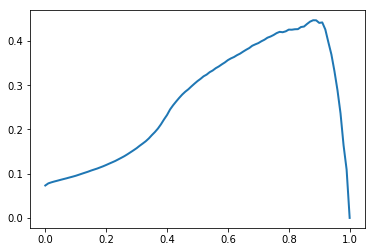

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


threshold 0.88
max f1_score 0.44685990338164255


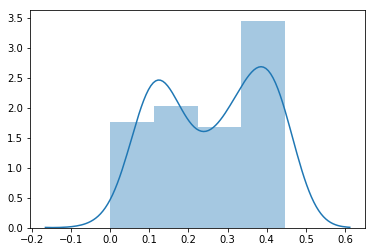

In [72]:
def predict(probs, threshold):
    preds = []
    for prob in probs:
        if prob > threshold:
            preds.append(1)
        else:
            preds.append(0)
    return np.array(preds)

f1_sc = 0
max_step = 0
#thr_sample = (dtest, test_y)
y_pred_proba = logit.predict_proba(X)
_score_preds = [prb[1] for prb in y_pred_proba]  # bst.predict(thr_sample[0], ntree_limit=bst.best_ntree_limit)
scores = []

for thr_step in np.linspace(0, 1, 101):
    _preds = predict(_score_preds, thr_step)
    f1_sc_step = f1_score(y, _preds)
    #print(thr_step, f1_sc_step)
    scores.append(f1_sc_step)
    if f1_sc_step >= f1_sc:
        f1_sc = f1_sc_step
        max_step = thr_step
plt.plot(np.linspace(0, 1, 101), scores, linewidth=2.0)
plt.show()
sns.distplot(scores)

threshold = max_step
print('threshold', threshold)
print('max f1_score', f1_sc)


In [73]:
y_pred = predict(_score_preds, threshold)

In [58]:
import pickle

imputer = pickle.load(open("pickles/stg2_imputer.data", "rb"))
scaler = pickle.load(open("pickles/stg2_scaler.data", "rb"))

In [59]:
val_data_file_name = "DATASETS_3/JAT_MCV_VAR_VARIABLES_SELECCION/SAMPLES/VALIDATION+201705.csv"
val_data_file_key = "{}/{}".format(prefix, val_data_file_name)
val_data_obj = s3_bucket_resource.Object(val_data_file_key).get()
val_data = pd.read_csv(io.BytesIO(val_data_obj['Body'].read()))

In [60]:
X_val = val_data.iloc[:,3:].values
X_val = imputer.transform(X_val)
X_val = scaler.transform(X_val)
y_val = val_data.loc[:,'BMI'].values

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [66]:
val_data.iloc[:,3:] = X_val
display(val_data.describe())

,LABEL,BMI,REVOLVENTE,CUR_BAL,MAX_BAL_03M,MIN_BAL_03M,AVG_PND_MENOS_BAL_03M,AVG_PND_MAS_BAL_03M,AVG_BAL_03M,MAX_BAL_06M,...,PCT_UN_CRE_CS_OP_ACC,PCT_UN_CRE_LSG_CL_ACC,PCT_UN_CRE_LSG_OP_ACC,PCT_UN_CRE_OP_ACC,PCT_UN_CRE_OTHER_CL_ACC,PCT_UN_CRE_OTHER_OP_ACC,PCT_UN_CRE_PQ_CL_ACC,PCT_UN_CRE_PQ_OP_ACC,PCT_UN_CRE_R_CL_ACC,PCT_UN_CRE_R_OP_ACC
count,82377.000000,82377.000000,82377.000000,82377.000000,82377.000000,82377.000000,82377.000000,82377.000000,82377.000000,82377.000000,...,82377.000000,82377.000000,82377.000000,82377.000000,82377.000000,82377.0,82377.000000,82377.000000,82377.000000,82377.000000
mean,6.854899,0.039781,0.744989,0.652824,0.634616,0.707067,0.630447,0.635377,0.630779,0.608697,...,0.001569,0.000304,0.000422,0.002229,0.000007,0.0,0.000282,0.000224,0.000164,0.000135
std,0.788583,0.195444,0.435870,1.462635,1.403476,1.586852,1.423046,1.431403,1.422147,1.313703,...,0.021874,0.005524,0.010003,0.026044,0.000718,0.0,0.005122,0.005413,0.004037,0.005033
min,1.000000,0.000000,0.000000,-0.313677,-0.334186,-0.300184,-0.328833,-0.326901,-0.328557,-0.322038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,-0.234640,-0.235426,-0.231426,-0.235431,-0.236146,-0.235388,-0.224406,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,1.000000,0.038900,0.033765,0.049732,0.033833,0.034133,0.034950,0.050327,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,1.000000,0.873472,0.915282,0.931946,0.860491,0.867426,0.861918,0.894111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,7.000000,1.000000,1.000000,10.811025,9.755124,12.920791,10.799657,10.789278,10.774125,8.818160,...,0.758621,0.250000,0.714286,0.758621,0.083333,0.0,0.250000,0.375000,0.200000,0.321429


In [74]:


cm_train = confusion_matrix(y, y_pred)

cm_train_pct = cm_train / cm_train.astype(np.float).sum()*100

summary = [
    ['------', 'Train'],
    ['confusion matrix', cm_train],
    ['confusion matrix pct', cm_train_pct],
    ['f1_score', f1_score(y, y_pred)],
    ['accuracy score', accuracy_score(y, y_pred)],
    ['recall score', recall_score(y, y_pred)],
    ['precision_score', precision_score(y, y_pred)]
]

pretty_table(summary)


------              	Train                      
confusion matrix    	[[44598  1397]             
                    	 [  893   925]]            
confusion matrix pct	[[93.27588731  2.92179951] 
                    	 [ 1.86769289  1.93462029]]
f1_score            	0.44685990338164255        
accuracy score      	0.9521050760253488         
recall score        	0.5088008800880088         
precision_score     	0.3983634797588286         


In [75]:
y_val_pred_proba = logit.predict_proba(X_val)
_val_score_preds = [prb[1] for prb in y_val_pred_proba]
y_val_pred = predict(_val_score_preds, threshold)

cm_train = confusion_matrix(y, y_pred)
cm_val = confusion_matrix(y_val, y_val_pred)

cm_train_pct = cm_train / cm_train.astype(np.float).sum()*100
cm_val_pct = cm_val / cm_val.astype(np.float).sum()*100

summary = [
    ['------', 'Train', 'Validation'],
    ['confusion matrix', cm_train, cm_val],
    ['confusion matrix pct', cm_train_pct, cm_val_pct],
    ['f1_score', f1_score(y, y_pred), f1_score(y_val, y_val_pred)],
    ['accuracy score', accuracy_score(y, y_pred), accuracy_score(y_val, y_val_pred)],
    ['recall score', recall_score(y, y_pred), recall_score(y_val, y_val_pred)],
    ['precision_score', precision_score(y, y_pred), precision_score(y_val, y_val_pred)]
]

pretty_table(summary)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


------              	Train                      	Validation                 
confusion matrix    	[[44598  1397]             	[[75187  3913]             
                    	 [  893   925]]            	 [ 1571  1706]]            
confusion matrix pct	[[93.27588731  2.92179951] 	[[91.27183559  4.75011229] 
                    	 [ 1.86769289  1.93462029]]	 [ 1.90708572  2.07096641]]
f1_score            	0.44685990338164255        	0.3835431654676259         
accuracy score      	0.9521050760253488         	0.9334280199570268         
recall score        	0.5088008800880088         	0.5205981080256332         
precision_score     	0.3983634797588286         	0.3036127424808685         


In [ ]:
model = SelectFromModel(logit, prefit=True)

---

In [5]:
"""Example of adaptive Lasso to produce event sparser solutions
Adaptive lasso consists in computing many Lasso with feature
reweighting. It's also known as iterated L1.
"""
# Authors: Alexandre Gramfort <firstname.lastname@inria.fr>
#
# License: BSD (3-clause)

import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso



In [11]:
X, y, coef = make_regression(n_samples=306, n_features=8000, n_informative=50,
                    noise=0.1, shuffle=True, coef=True, random_state=42)

X /= np.sum(X ** 2, axis=0)  # scale features



In [18]:
X = data.iloc[:,3:].values

In [19]:
X.shape

(47813, 3901)

In [22]:
y = data.iloc[:,1].values

In [23]:
y.shape

(47813,)

In [24]:
alpha = 0.1

g = lambda w: np.sqrt(np.abs(w))
gprime = lambda w: 1. / (2. * np.sqrt(np.abs(w)) + np.finfo(float).eps)

# Or another option:
# ll = 0.01
# g = lambda w: np.log(ll + np.abs(w))
# gprime = lambda w: 1. / (ll + np.abs(w))

n_samples, n_features = X.shape
p_obj = lambda w: 1. / (2 * n_samples) * np.sum((y - np.dot(X, w)) ** 2) \
                  + alpha * np.sum(g(w))

weights = np.ones(n_features)
n_lasso_iterations = 5

for k in range(n_lasso_iterations):
    X_w = X / weights[np.newaxis, :]
    clf = Lasso(alpha=alpha, fit_intercept=False)
    clf.fit(X_w, y)
    coef_ = clf.coef_ / weights
    weights = gprime(coef_)
    print(p_obj(coef_))  # should go down

print(np.mean((clf.coef_ != 0.0) == (coef != 0.0)))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.07610419526374725
0.019304620082816547
0.01871695422504835
0.018656354574688346
0.01863383589784842
0.0


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:25: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


In [25]:
(clf.coef_ != 0.0).sum()

25

In [38]:
for coef in clf.coef_:
    print( coef)
    

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
0.0
0.0
0.0
0.0
-0.0
0.0
0.0
0.0
0.0
-0.0
0.0
0.0
0.0
0.0
-0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
0.0
0.0
0.0
-0.0
0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
0.0
0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
0.0
-0.0
-0.0
0.0
0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
2.9221830221327945e-05
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.0
-0.0
-0.0
-0.0


In [45]:
c = 0
cols = data.columns
table = []
for coef in clf.coef_:
    c += 1
    if coef == 0.0:       
        continue
    table.append([cols[2+c], coef, c])
    
pretty_table(table)
print(c)
    

MAX_SALINI_BRG_R_CL_ACC       	2.0370670514367695e-05 	733 
MIN_SALINI_BK_CS_CL_ACC       	2.628606330033553e-05  	751 
AVG_VENC59_BK_OP_ACC_03M      	7.508351560803775e-05  	1057
MAX_VENC29_BK_CS_OP_ACC_12M   	1.760334609372275e-05  	1128
MAX_VENC29_OP_ACC_03M         	7.090670820427654e-05  	1150
MAX_VENC59_BRG_CS_OP_ACC_06M  	0.00019245869651990635 	1172
MAX_VENC119_BK_CS_OP_ACC      	0.00011887787272354939 	1330
MAX_VENC179_BK_OP_ACC         	3.475986049115076e-05  	1343
MAX_VENC1M_BRG_R_OP_ACC       	0.00010622746057819047 	1371
MAX_VENC89_BK_CS_OP_ACC       	0.00015607884061401994 	1402
MAX_VENC89_OP_ACC             	5.323191183410832e-05  	1410
MAX_VENC120M_BK_OP_ACC        	9.328363704661569e-05  	1547
MAX_VENC30M_BK_OP_ACC         	0.00012142858845703206 	1559
MAX_VENC90M_BK_CS_OP_ACC      	-3.6911014037593326e-05	1582
AVG_SALINI_BK_CS_OP_ACC       	-2.87866077184803e-05  	1822
AVG_SALINI_BK_R_OP_ACC_03M    	-5.2205454175603795e-05	1831
MAX_SALINI_BK_CS_OP_ACC_03M   	-6.811509

In [46]:
clf.predict(X)

array([  -8.5056863 ,  -26.39971911,    6.89403278, ..., -288.56386376,
         45.38980361,   18.85125139])